## Jupyter Notebook for Data Vis and Exploration

In [210]:
import scipy.io 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
gl_path = '/Users/sjohnson/GitHubRepositories/mp-MRI-Analysis/'

#### Loading .mat data for one rabbit
1. Loading multi-parametric data into dataframe

In [359]:
# Load animal dataframes
data_path = gl_path + 'Dataframes_and_Stats/'

# Get the list of .mat files from the animal path 
file_list = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f))]
file_list = np.asarray(file_list)

temp_df = pd.DataFrame()
for f in file_list:
    df = pd.read_pickle(data_path + file_list[0])
    temp_df = temp_df.append(df,ignore_index = True)
    print(df['anID'].value_counts())
    
rdat = temp_df

# Throw-out muscle data points with CTD over 1000
rdat = rdat[rdat['CTD_Map'] < 1000]

# generate another category with thermal dose labels for non-perfused volume
rdat.loc[rdat['CTD_Map'] >= 240,'TDbin'] = 1
rdat.loc[rdat['CTD_Map'] < 240,'TDbin'] = 0

print(rdat['anID'].value_counts())

AnID = rdat['anID']
AnID = AnID.astype('category')
rdat['anID'] = AnID

#print(rdat.info())


18_044    15258
Name: anID, dtype: int64
18_044    15258
Name: anID, dtype: int64
18_044    15258
Name: anID, dtype: int64
18_044    15258
Name: anID, dtype: int64
18_044    15258
Name: anID, dtype: int64
18_044    15258
Name: anID, dtype: int64


/Users/sjohnson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sjohnson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


18_044    90978
Name: anID, dtype: int64


/Users/sjohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [347]:
#make mini dfs for each CE segmentation type
colNames = rdat.columns
endInd = [i for i,item in enumerate(colNames) if "Seg" in item]
colNamesBase = colNames[0:endInd[0]]

colNamesGHR = colNamesBase.append(colNames[[i for i,item in enumerate(colNames) if "Grp_HighRes" in item]])
rdatGHR = rdat[colNamesGHR]
rdatGHR = rdatGHR.rename(columns={"Seg1_Grp_HighRes":"Seg1","Seg2_Grp_HighRes":"Seg2","LABEL_Grp_HighRes":"Label"})

colNamesGLR = colNamesBase.append(colNames[[i for i,item in enumerate(colNames) if "Grp_LowRes" in item]])
rdatGLR = rdat[colNamesGLR]
rdatGLR = rdatGLR[rdatGLR.columns[0:22]]
rdatGLR = rdatGLR.rename(columns={"Seg1_Grp_LowRes":"Seg1","Seg2_Grp_LowRes":"Seg2","LABEL_Grp_LowRes":"Label"})
print(rdatGLR.info)
#print(rdatGLR.head())
colNamesGLR2 = colNamesBase.append(colNames[[i for i,item in enumerate(colNames) if "Grp_LowRes2" in item]])
rdatGLR2 = rdat[colNamesGLR2]
rdatGLR2 = rdatGLR2.rename(columns={"Seg1_Grp_LowRes2":"Seg1","Seg2_Grp_LowRes2":"Seg2","LABEL_Grp_LowRes2":"Label"})
#print(rdatGLR2.info())
colNamesIHR = colNamesBase.append(colNames[[i for i,item in enumerate(colNames) if "Indv_HighRes" in item]])
rdatIHR = rdat[colNamesIHR]
rdatIHR = rdatIHR.rename(columns={"Seg1_Indv_HighRes":"Seg1","Seg2_Indv_HighRes":"Seg2","LABEL_Indv_HighRes":"Label"})
#print(rdatIHR.info())
 

<bound method DataFrame.info of                       CTD_Map    MTP_Map      Post_ADC      Post_T1  Post_T1w  \
0       68.905266    0.496194  44.840958  1.418996e+03  1396.999512     276.0   
1       82.071838    0.225910  42.918999  1.756274e-02  1373.999512     277.0   
2       60.657120    0.103816  41.282570  2.751358e-04  1373.999512     283.0   
3       53.279446    0.102715  41.560680  5.980835e-09  1232.999512     317.0   
4       72.464005    1.734867  46.434166  1.038356e-02  1406.999512     347.0   
5       69.132278    0.481470  44.432625  1.178984e+03  1314.999512     308.0   
6       70.977722    0.773057  44.173492  1.037261e-07  1290.999512     246.0   
7       82.165070    1.026085  46.377266  6.939896e+02  1160.999634     269.0   
8       67.391090    0.188065  42.282421  1.559976e+03  1314.999512     274.0   
9       79.753387    0.099498  41.438431  4.983209e-05  1290.999512     298.0   
10      88.592239    0.064268  41.015057  3.361200e-14  1160.999634     326.0

In [348]:
params = ['Pre_T1w','Post_T1w','Pre_T2w','Post_T2w','Pre_T1','Post_T1','Pre_T2','Post_T2','Pre_ADC','Post_ADC']
paramsCor1 = ['Pre_T1w','Post_T1w','Pre_T2w','Post_T2w','Pre_T1_cor1','Post_T1','Pre_T2_cor1','Post_T2','Pre_ADC','Post_ADC']
paramsCor2 = ['Pre_T1w','Post_T1w','Pre_T2w','Post_T2w','Pre_T1_cor2','Post_T1','Pre_T2_cor2','Post_T2','Pre_ADC','Post_ADC']

dfplt = rdatGHR[params]
P = dfplt.shape[1]

dfDiff = pd.DataFrame()
cols = dfplt.columns
for p in range(0,P,2):   
    param = cols[p]
    param = 'Diff_'+ param[4:]
    dfDiff[param] = dfplt[cols[p+1]]-dfplt[cols[p]]
    
dfDiff['MTP'] = rdatGHR['MTP_Map']
dfDiff['CTD'] = rdatGHR['CTD_Map'] 
dfDiff.head()

,Diff_T1w,Diff_T2w,Diff_T1,Diff_T2,Diff_ADC,MTP,CTD
0,-21.699982,57.094734,104.000000,-13.199886,1330.998199,44.840958,0.496194
1,-30.212555,48.928162,342.999878,-14.300045,-1187.970230,42.918999,0.225910
2,-38.014496,131.342880,1064.999512,-111.400009,-650.015533,41.282570,0.103816
3,-6.681519,122.720554,921.999512,-78.900024,-594.000610,41.560680,0.102715
4,51.432404,52.535995,65.000000,-12.300007,0.010126,46.434166,1.734867


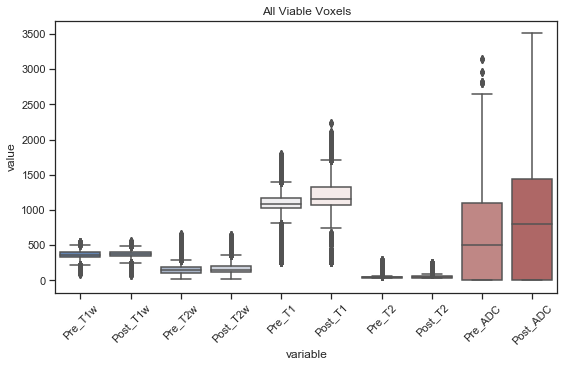

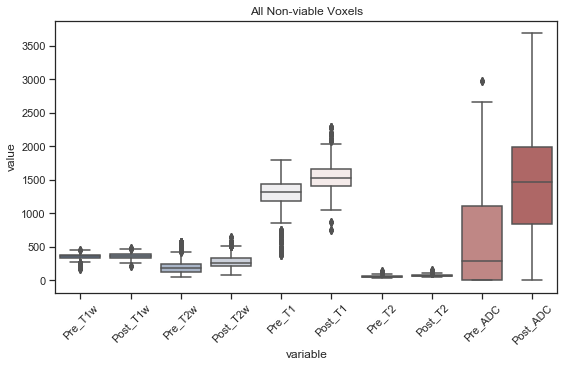

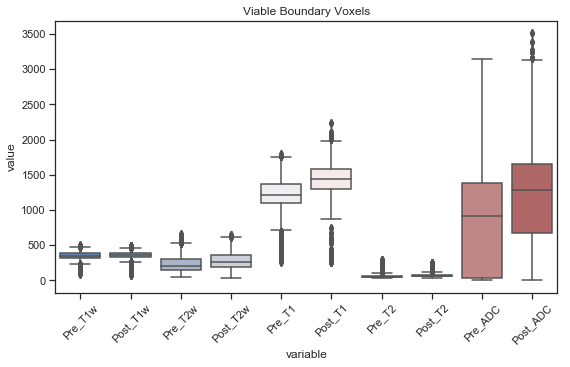

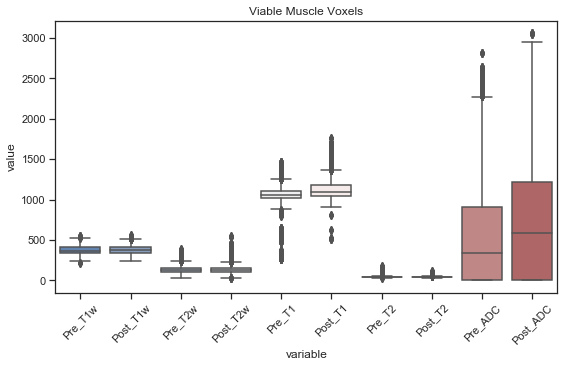

In [349]:
# Box plots: Y = ΔParam; X = ROI 

dfpltV = dfplt.groupby(rdatGHR['Seg1']).get_group(('allV'))
dfpltN = dfplt.groupby(rdatGHR['Seg1']).get_group(('nonV'))

dfpltbV = dfplt.groupby(rdatGHR['Seg2']).get_group(('bndV'))
dfpltmV = dfplt.groupby(rdatGHR['Seg2']).get_group(('mucV'))

sns.set(style='ticks',rc={'figure.figsize':(9,5)})
#sns.set_context('paper')
sns.boxplot(x='variable',y='value',data=pd.melt(dfpltV),palette='vlag')
plt.xticks(rotation=45)
plt.title('All Viable Voxels')
plt.show()

sns.boxplot(x='variable',y='value',data=pd.melt(dfpltN),palette='vlag')
plt.xticks(rotation=45)
plt.title('All Non-viable Voxels')
plt.show()

sns.boxplot(x='variable',y='value',data=pd.melt(dfpltbV),palette='vlag')
plt.xticks(rotation=45)
plt.title('Viable Boundary Voxels')
plt.show()

sns.boxplot(x='variable',y='value',data=pd.melt(dfpltmV),palette='vlag')
plt.xticks(rotation=45)
plt.title('Viable Muscle Voxels')
plt.show()
#bp = dfplt.boxplot(by='Seg1')

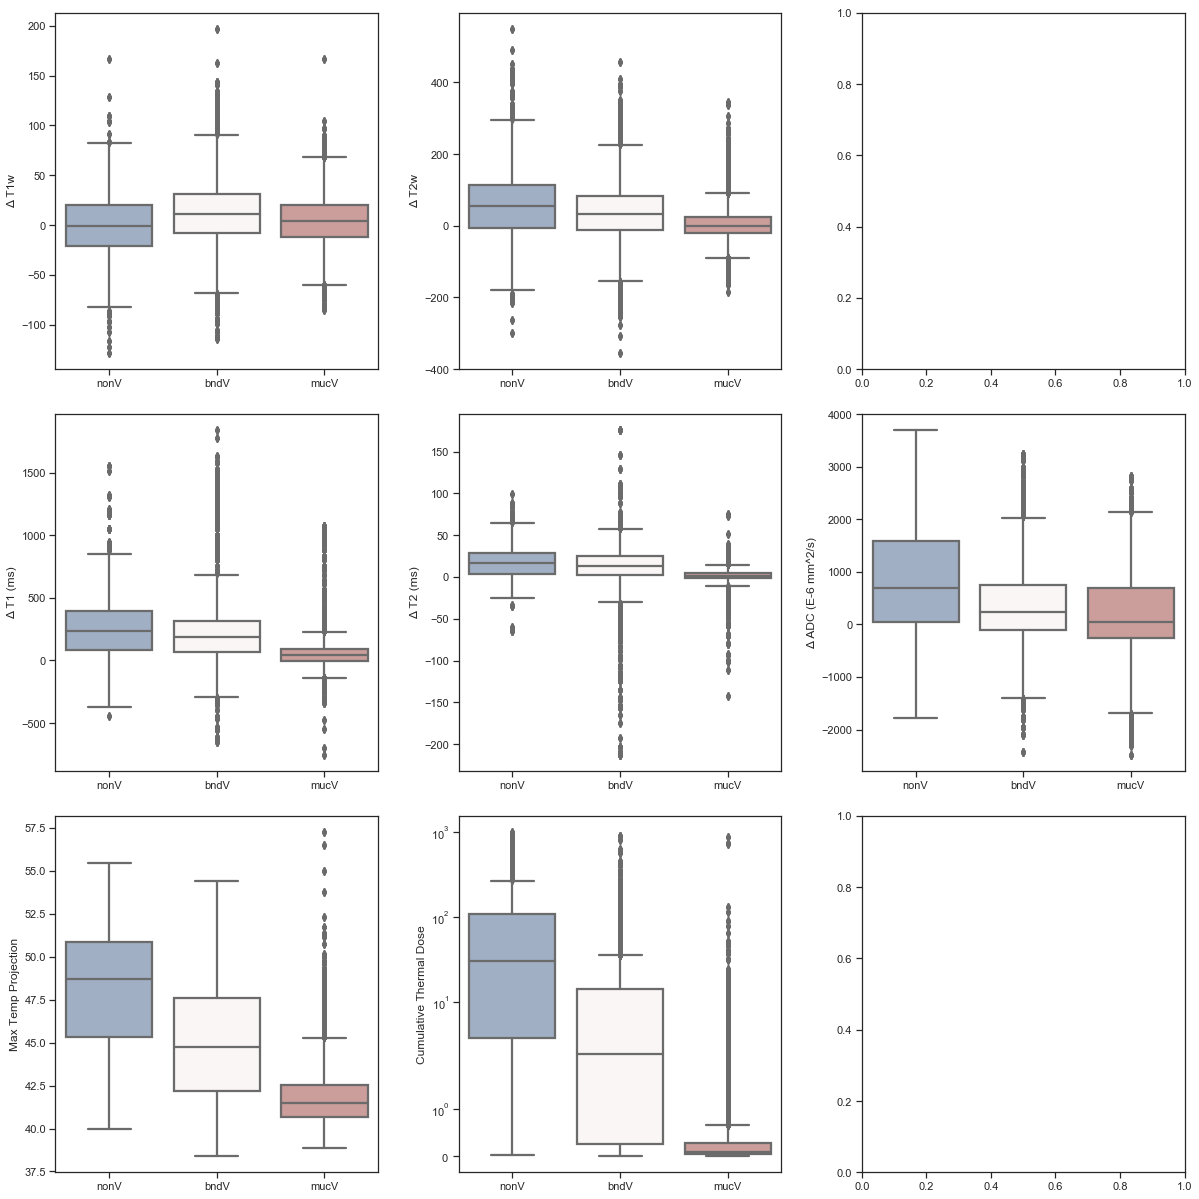

In [350]:
dfDiff['Seg2'] = rdatGHR['Seg2']
grps = 'Seg2'
odr=['nonV','bndV','mucV']

f, axes = plt.subplots(3,3,figsize=(17,17), sharex=False)
#sns.set(style='ticks',rc={'figure.figsize':(5,5)})
sns.set_context('talk')
sns.boxplot(x=grps,y='Diff_T1w',data=dfDiff,palette='vlag',order=odr,ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel('Δ T1w')

sns.boxplot(x=grps,y='Diff_T2w',data=dfDiff,palette='vlag',order=odr,ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel('Δ T2w')

sns.boxplot(x=grps,y='Diff_T1',data=dfDiff,palette='vlag',order=odr,ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel('Δ T1 (ms)')

sns.boxplot(x=grps,y='Diff_T2',data=dfDiff,palette='vlag',order=odr,ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel('Δ T2 (ms)')

sns.boxplot(x=grps,y='Diff_ADC',data=dfDiff,palette='vlag',order=odr,ax=axes[1,2])
axes[1,2].set_xlabel("")
axes[1,2].set_ylabel('Δ ADC (E-6 mm^2/s)')

sns.boxplot(x=grps,y='MTP',data=dfDiff,palette='vlag',order=odr,ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel('Max Temp Projection')

sns.boxplot(x=grps,y='CTD',data=dfDiff,palette='vlag',order=odr,ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel('Cumulative Thermal Dose')
axes[2,1].set_yscale('symlog')
plt.tight_layout()


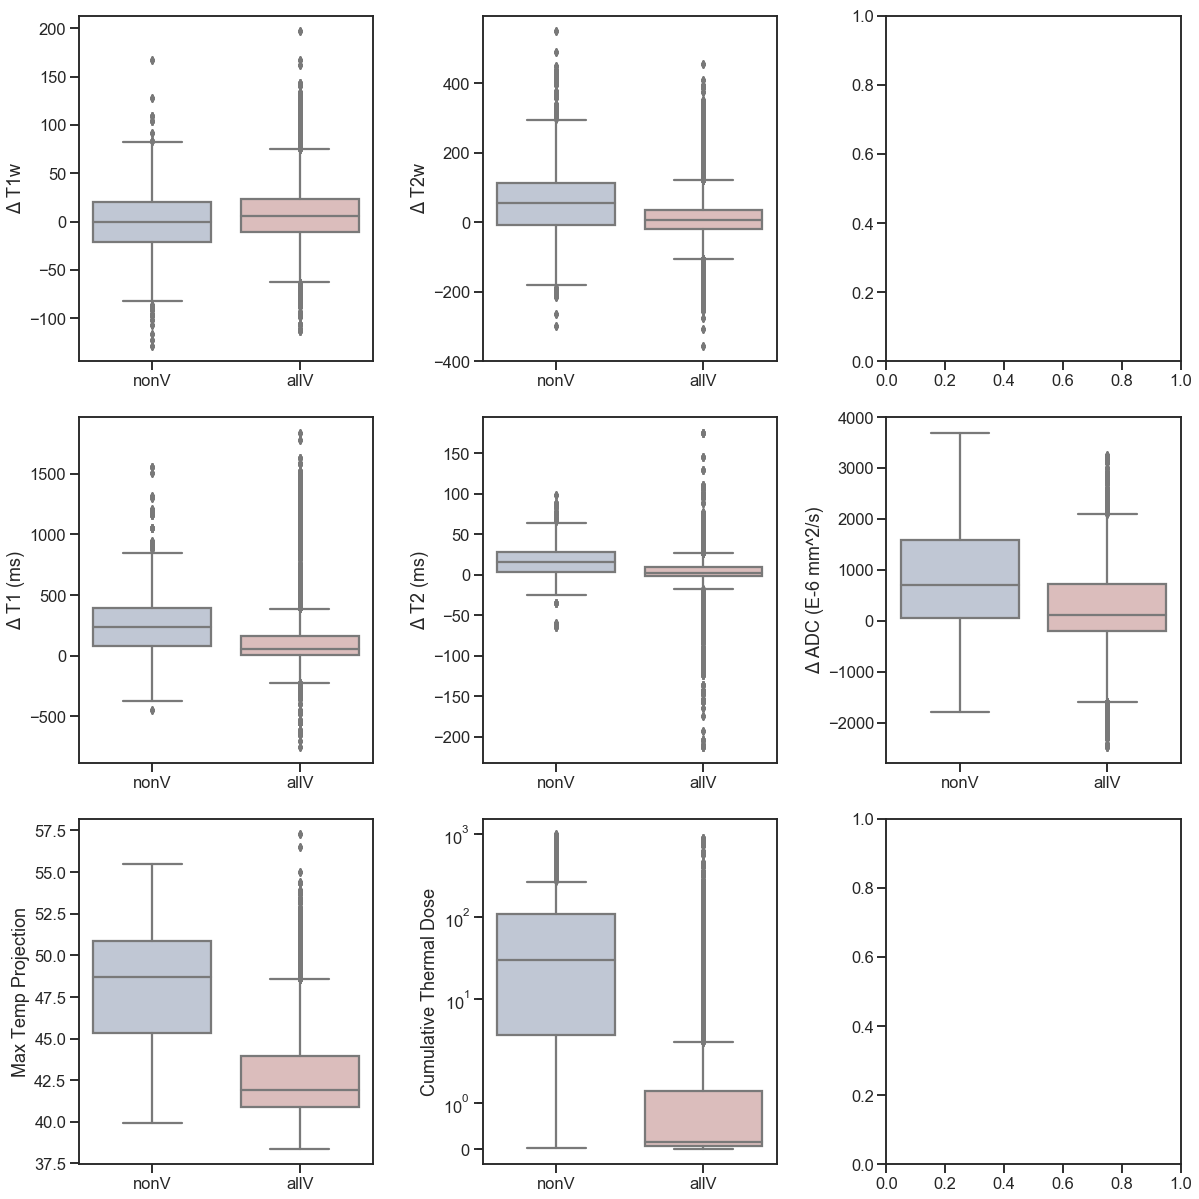

In [203]:
dfDiff['Seg1'] = rdatGHR['Seg1']
grps = 'Seg1'
odr = ['nonV','allV']

f, axes = plt.subplots(3,3,figsize=(17,17), sharex=False)
#sns.set(style='ticks',rc={'figure.figsize':(5,5)})
sns.set_context('talk')
sns.boxplot(x=grps,y='Diff_T1w',data=dfDiff,palette='vlag',order=odr ,ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel('Δ T1w')

sns.boxplot(x=grps,y='Diff_T2w',data=dfDiff,palette='vlag',order=odr,ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel('Δ T2w')

sns.boxplot(x=grps,y='Diff_T1',data=dfDiff,palette='vlag',order=odr,ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel('Δ T1 (ms)')

sns.boxplot(x=grps,y='Diff_T2',data=dfDiff,palette='vlag',order=odr,ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel('Δ T2 (ms)')

sns.boxplot(x=grps,y='Diff_ADC',data=dfDiff,palette='vlag',order=odr,ax=axes[1,2])
axes[1,2].set_xlabel("")
axes[1,2].set_ylabel('Δ ADC (E-6 mm^2/s)')

sns.boxplot(x=grps,y='MTP',data=dfDiff,palette='vlag',order=odr,ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel('Max Temp Projection')

sns.boxplot(x=grps,y='CTD',data=dfDiff,palette='vlag',order=odr,ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel('Cumulative Thermal Dose')
axes[2,1].set_yscale('symlog')
plt.tight_layout()


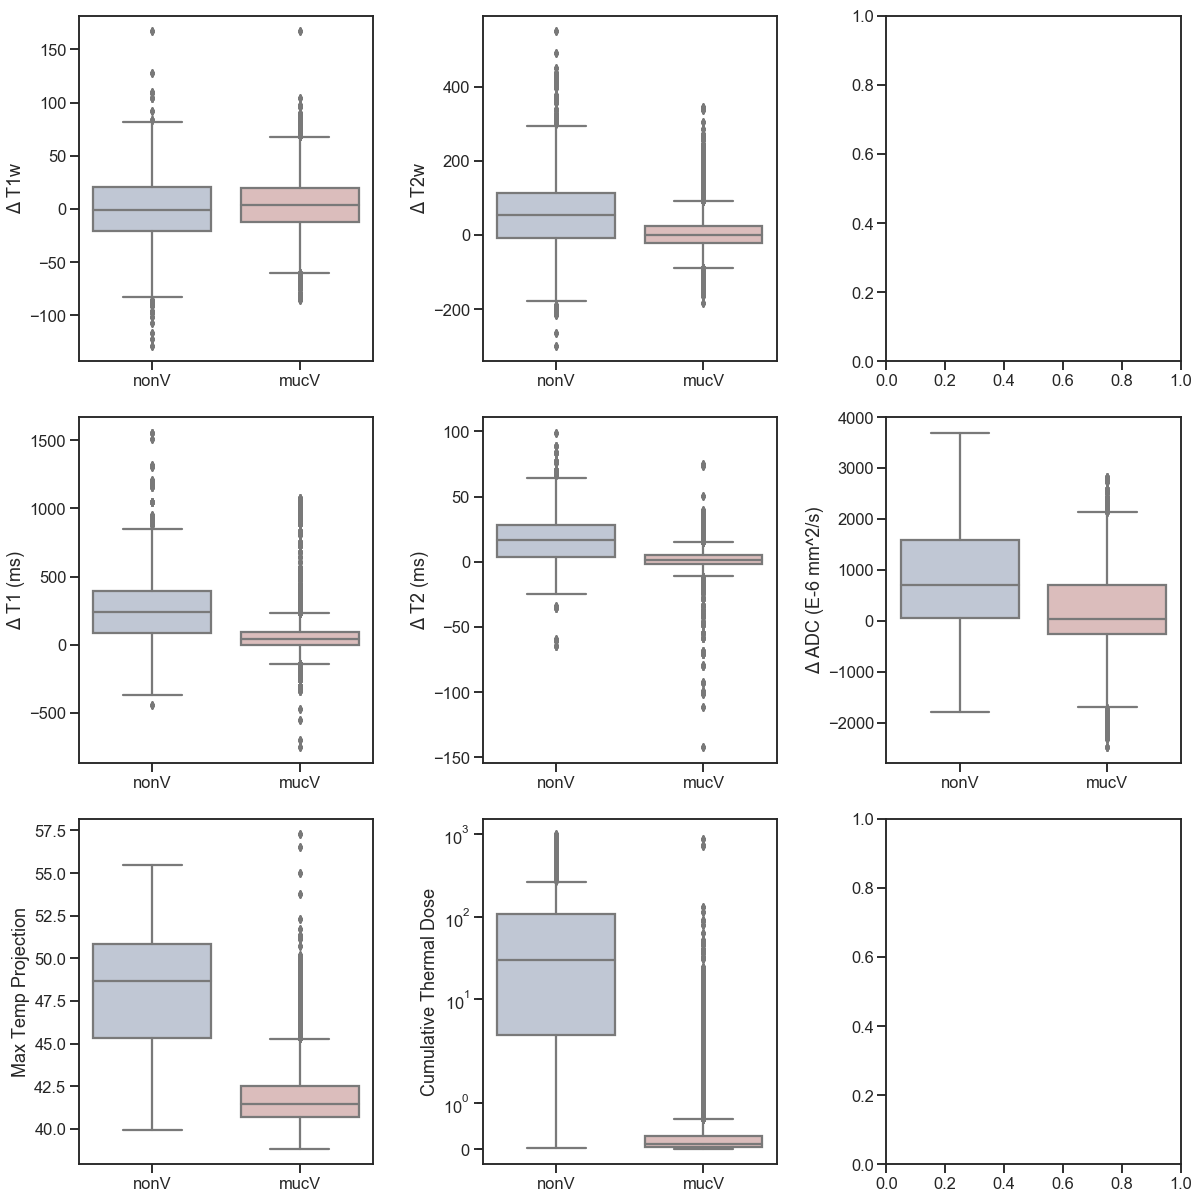

In [351]:
dfDiff['Seg2'] = rdatGHR['Seg2']
dfDiff = dfDiff[dfDiff['Seg2'] != 'bndV']
grps = 'Seg2'
odr = ['nonV','mucV']

f, axes = plt.subplots(3,3,figsize=(17,17), sharex=False)
#sns.set(style='ticks',rc={'figure.figsize':(5,5)})
sns.set_context('talk')
sns.boxplot(x=grps,y='Diff_T1w',data=dfDiff,palette='vlag',order=odr ,ax=axes[0,0])
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel('Δ T1w')

sns.boxplot(x=grps,y='Diff_T2w',data=dfDiff,palette='vlag',order=odr,ax=axes[0,1])
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel('Δ T2w')

sns.boxplot(x=grps,y='Diff_T1',data=dfDiff,palette='vlag',order=odr,ax=axes[1,0])
axes[1,0].set_xlabel("")
axes[1,0].set_ylabel('Δ T1 (ms)')

sns.boxplot(x=grps,y='Diff_T2',data=dfDiff,palette='vlag',order=odr,ax=axes[1,1])
axes[1,1].set_xlabel("")
axes[1,1].set_ylabel('Δ T2 (ms)')

sns.boxplot(x=grps,y='Diff_ADC',data=dfDiff,palette='vlag',order=odr,ax=axes[1,2])
axes[1,2].set_xlabel("")
axes[1,2].set_ylabel('Δ ADC (E-6 mm^2/s)')

sns.boxplot(x=grps,y='MTP',data=dfDiff,palette='vlag',order=odr,ax=axes[2,0])
axes[2,0].set_xlabel("")
axes[2,0].set_ylabel('Max Temp Projection')

sns.boxplot(x=grps,y='CTD',data=dfDiff,palette='vlag',order=odr,ax=axes[2,1])
axes[2,1].set_xlabel("")
axes[2,1].set_ylabel('Cumulative Thermal Dose')
axes[2,1].set_yscale('symlog')
plt.tight_layout()


In [280]:
import sklearn.metrics as skmetric


cm = skmetric.confusion_matrix(rdatGHR['Label'],rdat['TDbin'])
print('Confusion matrix for GHR:')
print(cm)
#cmN = cm.astype('float')/cm.sum(axis=1)
sens = cm[0,0]/(cm[0,0]+cm[1,0])
spec = cm[1,1]/(cm[1,1]+cm[0,1])
acc = (cm[0,0]+cm[1,1])/np.sum(cm) 
print('Sensitivity: ' + str(sens) + '. Specificity: ' + str(spec) + '. Accuracy: ' + str(acc))

cm = skmetric.confusion_matrix(rdatGLR['Label'],rdat['TDbin'])
print('Confusion matrix for GLR:')
print(cm)
#cmN = cm.astype('float')/cm.sum(axis=1)
sens = cm[0,0]/(cm[0,0]+cm[1,0])
spec = cm[1,1]/(cm[1,1]+cm[0,1])
acc = (cm[0,0]+cm[1,1])/np.sum(cm) 
print('Sensitivity: ' + str(sens) + '. Specificity: ' + str(spec) + '. Accuracy: ' + str(acc))

cm = skmetric.confusion_matrix(rdatGLR2['Label'],rdat['TDbin'])
print('Confusion matrix for GLR2:')
print(cm)
#cmN = cm.astype('float')/cm.sum(axis=1)
sens = cm[0,0]/(cm[0,0]+cm[1,0])
spec = cm[1,1]/(cm[1,1]+cm[0,1])
acc = (cm[0,0]+cm[1,1])/np.sum(cm) 
print('Sensitivity: ' + str(sens) + '. Specificity: ' + str(spec) + '. Accuracy: ' + str(acc))

cm = skmetric.confusion_matrix(rdatIHR['Label'],rdat['TDbin'])
print('Confusion matrix for IHR:')
print(cm)
#cmN = cm.astype('float')/cm.sum(axis=1)
sens = cm[0,0]/(cm[0,0]+cm[1,0])
spec = cm[1,1]/(cm[1,1]+cm[0,1])
acc = (cm[0,0]+cm[1,1])/np.sum(cm) 
print('Sensitivity: ' + str(sens) + '. Specificity: ' + str(spec) + '. Accuracy: ' + str(acc))

Confusion matrix for GHR:
[[84204   156]
 [ 5898   720]]
Sensitivity: 0.934540853699141. Specificity: 0.821917808219178. Accuracy: 0.933456440018466
Confusion matrix for GLR:
[[85170   234]
 [ 4932   642]]
Sensitivity: 0.9452620363587934. Specificity: 0.7328767123287672. Accuracy: 0.9432170414825563
Confusion matrix for GLR2:
[[82296   144]
 [ 7806   732]]
Sensitivity: 0.9133648531664114. Specificity: 0.8356164383561644. Accuracy: 0.9126162368924355
Confusion matrix for IHR:
[[85656   228]
 [ 4446   648]]
Sensitivity: 0.9506559232869415. Specificity: 0.7397260273972602. Accuracy: 0.9486249422937414


In [290]:
report = skmetric.classification_report(rdatIHR['Label'],rdat['TDbin'])
print(report)
report = skmetric.f1_score(rdatIHR['Label'],rdat['TDbin'])
print(report)

report = skmetric.jaccard_similarity_score(rdatIHR['Label'],rdat['TDbin'])
print(report)



             precision    recall  f1-score   support

          0       0.95      1.00      0.97     85884
          1       0.74      0.13      0.22      5094

avg / total       0.94      0.95      0.93     90978

0.21708542713567835
0.9486249422937414


In [365]:
rdatGHRbnd = rdatGHR[(rdatGHR.Seg2 == 'nonV') | (rdatGHR.Seg2 == 'bndV')]
rdatbnd = rdat[(rdatGHR.Seg2 == 'nonV') | (rdatGHR.Seg2 == 'bndV')]

dfsub = rdatGHRbnd
y_truth = rdatGHRbnd['Label']
y_pred = rdatbnd['TDbin']

def getStats(y_truth,y_pred,dfsub):
    cm = skmetric.confusion_matrix(y_truth,y_pred)

    ###### Number statistics
    TN,FP,FN,TP = cm.ravel()
    DICE = 2*(TP)/(2*TP+FP+FN)
    print(DICE)
    Prec,Sens,f1Score,support = skmetric.precision_recall_fscore_support(y_truth,y_pred)
    print(Prec)
    print(Sens)
   
    Accuracy = (TP+TN)/(TP+TN+FN+FP)
    
    ##### 240 class statistics
    Sensitivity240 = Sens[1]
    #Specificity = TN/(TN+FP)
    Precision240 = Prec[1]
    #NPV = TN/(TN+FN)
    
    ##### Similarity metrics 
    Jaccard_Sim = skmetric.jaccard_similarity_score(y_truth,y_pred)
    Dice_Sim = skmetric.f1_score(y_truth,y_pred)
    union = len(dfsub[(y_truth) & (y_pred)])
    x = y_truth.value_counts()
    ntruth = x[1]
    x = y_pred.value_counts()
    npred = x[1]
    Overlap_Sim = union/min(ntruth,npred)
    
    stat_array = [TP,TN,FP,FN,Sensitivity240,Precision240,Accuracy,Jaccard_Sim,Dice_Sim,Overlap_Sim]
    return stat_array

stats = getStats(y_truth,y_pred,dfsub)
print(stats)

0.1926163723916533
[0.81584863 0.83916084]
[0.99474646 0.1087942 ]
[720, 26130, 138, 5898, 0.10879419764279238, 0.8391608391608392, 0.8164568509396095, 0.8164568509396095, 0.19261637239165327, 0.8391608391608392]


In [361]:
rdatGHRbnd = rdatGHR[(rdatGHR.Seg2 == 'nonV') | (rdatGHR.Seg2 == 'bndV')]
rdatbnd = rdat[(rdatGHR.Seg2 == 'nonV') | (rdatGHR.Seg2 == 'bndV')]
rdatGHRbnd['TDbin'] = rdatbnd['TDbin']

#18-044
#groupby(rdatGHR['Seg1']).get_group(('allV'))
dat044 = rdatGHRbnd.groupby(rdatGHRbnd['anID']).get_group('18_044')
print(dat044.info())

print(rdatGHRbnd['anID'].value_counts())

#stats_GHR044 = getStats(dat044['Label'],dat044['TDbin'],dat044)
#print(stats_GHR044)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32886 entries, 54 to 85946
Data columns (total 23 columns):
               32886 non-null float64
CTD_Map        32886 non-null float64
MTP_Map        32886 non-null float64
Post_ADC       32886 non-null float64
Post_T1        32886 non-null float64
Post_T1w       32886 non-null float64
Post_T2        32886 non-null float64
Post_T2w       32886 non-null float64
Pre_ADC        32886 non-null float64
Pre_T1         32886 non-null float64
Pre_T1_cor1    32886 non-null float64
Pre_T1_cor2    32886 non-null float64
Pre_T1w        32886 non-null float64
Pre_T2         32886 non-null float64
Pre_T2_cor1    32886 non-null float64
Pre_T2_cor2    32886 non-null float64
Pre_T2w        32886 non-null float64
anID           32886 non-null category
ImageIdx       32886 non-null int64
Seg1           32886 non-null category
Seg2           32886 non-null category
Label          32886 non-null uint8
TDbin          32886 non-null float64
dtypes: category(

/Users/sjohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
